# Εργασία Ανάκτησης Πληροφορίας

Δημιουργία μηχανής αναζήτησης
Η εργασία αφορά στην πρακτική εξάσκηση και εμπειρία στη δημιουργία μιας απλής μηχανής
αναζήτησης με σκοπό την κατανόηση των θεμελιωδών εννοιών της ανάκτησης πληροφορίας, της
ευρετηρίασης, της κατάταξης και της αναζήτησης πληροφορίας, καθώς και πρακτικές δεξιότητες στην
επεξεργασία φυσικής γλώσσας και την εφαρμογή αλγορίθμων αναζήτησης.
Στόχοι της εργασίας:
• Ο σχεδιασμός και υλοποίηση ενός συστήματος ανάκτησης εγγράφων που μπορεί να
ευρετηριάσει και να αναζητήσει αποτελεσματικά σε μια συλλογή εγγράφων κειμένου.
• Η ανάπτυξη αλγορίθμων ανάκτησης και η αξιολόγηση της απόδοσή τους χρησιμοποιώντας
κοινές μετρήσεις αξιολόγησης, όπως ακρίβεια, ανάκληση και βαθμολογία F1.
• Η παροχή μιας φιλικής προς το χρήστη διεπαφής για τους χρήστες να εισάγουν ερωτήματα
και να ανακτούν σχετικά έγγραφα.
• Η απόκτηση πρακτικής εμπειρίας σε διάφορες τεχνικές ανάκτησης πληροφοριών, όπως
Boolean retrieval, Vector Space Model και Probabilistic retrieval models.
Περιγραφή εργασίας
Υλοποιείστε μια μηχανή αναζήτησης που ανακτά έγγραφα από το Wikipedia με βάση τα ερωτήματα
των χρηστών.

## Βημα 1. Συλλογη δεδομένων

Στην αρχή, κάνουμε εγκατάσταση των βιβλιοθηκών requests, BeautifulSoup και json. Στη συνέχεια, κάνουμε και τα απαραίτητα imports.

In [5]:
import requests
from bs4 import BeautifulSoup
import json

Εκχωρούμε στο url το αρχικό URL όπου ο web scraper μας θα ψάξει για άρθρα, καθώς και τον μέγιστο αριθμό άρθρων που θα δέχεται.

In [7]:
url = "https://en.wikipedia.org/wiki/Information_retrieval"

max_articles = 50

Φτιάχνουμε τη λίστα articles, η οποία θα αποθηκεύει τα δεδομένα των άρθρων, το set visited_urls για να αποθηκεύουμε τα URL που έχουμε ήδη ψάξει, και τo set url_scrape, η οποία θα περιέχει τα URL που πρόκειται να ψάξουμε, αρχικοποιημένη με το αρχικό URL.

In [9]:
articles = []
visited_url = set()
url_scrape = {url}  

Με μία while ελέγχουμε αν έχουμε ξεπεράσει το όριο του max_articles. Στη συνέχεια, παίρνουμε το τρέχον URL που είναι να κάνουμε scrape και το παιρνάμε στην μεταβλητή current_url.

In [11]:
while url_scrape and len(articles) < max_articles:
    current_url = url_scrape.pop()

Με μία if ελέγχουμε άμα το τρέχων url βρίσκεται στην λίστα των url που έχουμε κάνει είδη scrape.

In [13]:
    if current_url in visited_url:
        continue

SyntaxError: 'continue' not properly in loop (1288168475.py, line 2)

Παίρνουμε το περιεχόμενο του link χρησιμοποιώντας τη συνάρτηση get της βιβλιοθήκης requests και το αποθηκεύουμε στο αντικείμενο response. Στη συνέχεια, ελέγχουμε αν το αίτημά μας ήταν επιτυχές μέσω της συνάρτησης raise_for_status.

In [ ]:
    try:
        response = requests.get(current_url)
        response.raise_for_status()

Φτιάχνουμε ένα αντικείμενο BeautifulSoup με δύο παραμέτρους: το περιεχόμενο του link που περάσαμε στο αντικείμενο response και τον html.parser

In [ ]:
        soup = BeautifulSoup(response.text, 'html.parser')

Βρίσκουμε τον τίτλο του άρθρου και τον καταχωρούμε στη μεταβλητή article_title, χρησιμοποιώντας τη συνάρτηση find της βιβλιοθήκης BeautifulSoup, με όρισμα το HTML tag h1 για τίτλους, και φιλτράρουμε με το id: firstHeading, το οποίο χρησιμοποιεί η Wikipedia για τους τίτλους της. Στη συνέχεια, με τη βοήθεια της ίδιας βιβλιοθήκης και της συνάρτησης find_all, με όρισμα το p που είναι το HTML tag των παραγράφων, περνάμε στη μεταβλητή paragraphs όλες τις παραγράφους του άρθρου. Τέλος, χρησιμοποιώντας τη συνάρτηση join, ενώνουμε όλες τις παραγράφους και τις περνάμε στη μεταβλητή content.

In [ ]:
        article_title = soup.find('h1', {'id': 'firstHeading'}).text.strip()
        paragraphs = soup.find_all('p')
        content = " ".join([para.text for para in paragraphs if para.text])

Προσθέτουμε στη λίστα articles το άρθρο μας, συμπεριλαμβάνοντας τον τίτλο του (article_title), το URL του (current_url) και το περιεχόμενό του (content).

In [ ]:
        articles.append({
            "title": article_title,
            "url": current_url,
            "content": content})

Μίας και ψάξαμε ίδη το τωρινό url το προσθέτουμε στο set των επισκεπτώμενων url.

In [ ]:
        visited_url.add(current_url)

Μπαίνουμε σε ένα for loop για την αναζήτηση του επόμενου της Wikipedia. Με τη βοήθεια της συνάρτησης find_all, με όρισμα a, που είναι το tag των hyperlinks στην HTML, και δεύτερο όρισμα το href=True όπου είναι το link και με το true σημαίνει να περιέχει link. Κάθε link που εντοπίζουμε αποθηκεύεται στη μεταβλητή links κατά την επανάληψη

In [ ]:
        for link in soup.find_all('a', href=True):
            links = link['href']

Ελέγχουμε αν ο σύνδεσμος αρχίζει με /wiki/ και αποφεύγουμε συνδέσμους που ξεκινούν με /wiki/Special: ή περιέχουν :, ώστε να είναι άρθρο της Wikipedia και να μην είναι ειδικές σελίδες ή namespaces. Δημιουργούμε το πλήρες URL και το προσθέτουμε στο visited_url, σε περίπτωση που δεν το έχουμε επισκεφτεί ήδη.

In [ ]:
            if links.startswith('/wiki/') and not links.startswith('/wiki/Special:') and ':' not in links:
                full_url = f"https://en.wikipedia.org{links}"
                if full_url not in visited_url:
                    url_scrape.add(full_url)

Αν τυχόν κάτι πάει λάθος με κάποιο request, εκτυπώνουμε το μήνυμα "Request failed".

In [ ]:
    except requests.RequestException:
        print("Request failed")

Θα δημιουργήσουμε το αρχείο data.json, με το περιεχόμενό του να περιλαμβάνει τους τίτλους των άρθρων, τα URL των άρθρων και τα περιεχόμενα των άρθρων, χρησιμοποιώντας indent=4 ώστε τα δεδομένα να είναι πιο ευανάγνωστα.

In [ ]:
with open("data.json", "w") as file:
    json.dump(articles, file, indent=4)

Τα περιοχόμενα του data.json.

In [ ]:
from IPython.display import Image, display

image_path = r"data_screen.png"
display(Image(filename=image_path))

## Βήμα 2. Προεπεξεργασία κειμένου

Στην αρχή, κάνουμε εγκατάσταση των βιβλιοθηκών nltk και json. Στη συνέχεια, κάνουμε και τα απαραίτητα imports.

In [ ]:
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Με την συνάρτηση open ανοίγουμε το αρχείο data.json που δημιουγρήθηκε από το προηγούμενο βήμα και περνάμε τα περιοχόμενα του στην μεταβλητή data. Το περικυκλωνουμε με μια try except σε περίπτωση που δεν βρούμε το αρχείο, και αν προκύψει σφάλμα εκπτυπωνουμε "File not found"  και βγαίνουμε από το πρόγραμμα.

In [ ]:
try:
    with open("data.json", "r") as file:
        data = json.load(file)
except FileNotFoundError:
    print("File not found")
    exit(0)

Δημιουργούμε ένα αντικείμενο WordNetLemmatizer από τη βιβλιοθήκη nltk και το αποθηκεύουμε στη μεταβλητή lemmatizer, ώστε να το χρησιμοποιήσουμε αργότερα για την εκτέλεση lemmatization. Παράλληλα, δημιουργούμε μια λίστα με τα αγγλικά stop words.

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

Δημιουργούμε μία κενή λίστα ώστε να περάσουμε αργότερα τα δεδομένα που θα συλλέξουμε.

In [ ]:
processed_data = []

Με την βοήθεια μιας for θα προσπεράσουμε κάθε άρθρο που βρίσκεται μέσα στο data, θα ελέγχουμε άμα το άθρο είναι κενό, θα αφαιρέσουμε τα κενά διαστήματ  και θα περάσουμε τα περιεχόμενα του άρθρου στην μεταβλητή content για περαιτέρω επαιξεργασία.

In [ ]:
for article in data:
    content = article.get("content", "").strip()
    if not content:
        continue

Με τη συνάρτηση word_tokenize τεμαχίζουμε το content σε μια λίστα λέξεων και αποθηκεύουμε το αποτέλεσμα στη μεταβλητή tokenized_words.

In [ ]:
    tokenized_words = word_tokenize(content)

Μετατρέπουμε όλες τις λέξεις της λίστας tokenized_words σε πεζά, χρησιμοποιώντας τη συνάρτηση lower.

In [ ]:
    tokenized_words = [word.lower() for word in tokenized_words]

Φιλτράρουμε την λίστα ελέγχοντας άμα οι λέξεις που έχουμε αποτελούνται από αλφαβητικούς χαρακτήρες.

In [ ]:
    tokenized_words = [word for word in tokenized_words if word.isalpha()]

Αφαιρούμε όλα τα stop words από την λίστα.

In [ ]:
    tokenized_words = [word for word in tokenized_words if word not in stop_words]

Κάνουμε lemmatize την λίστα μας με χρήση της συνάρτησης lemmatize.

In [ ]:
    tokenzied_words = [lemmatizer.lemmatize(word) for word in tokenized_words]

Προσθέτουμε την λίστα με την επεξαιργασμένες λέξεις μας στο processed_data.

In [ ]:
    processed_data.append(" ".join(tokenized_words))

Θα δημιουργήσουμε το αρχείο processed_data.json, με το περιεχόμενό του να είναι όλες οι επεξεργασμένες λέξεις που βρήκαμε σε όλα τα άθρα, χρησιμοποιώντας indent=4 ώστε τα δεδομένα να είναι πιο ευανάγνωστα.

In [ ]:
with open("processed_data.json", "w") as file:
    json.dump(processed_data, file, indent=4)

Τα περιεχόμενα του proccesed_data.json

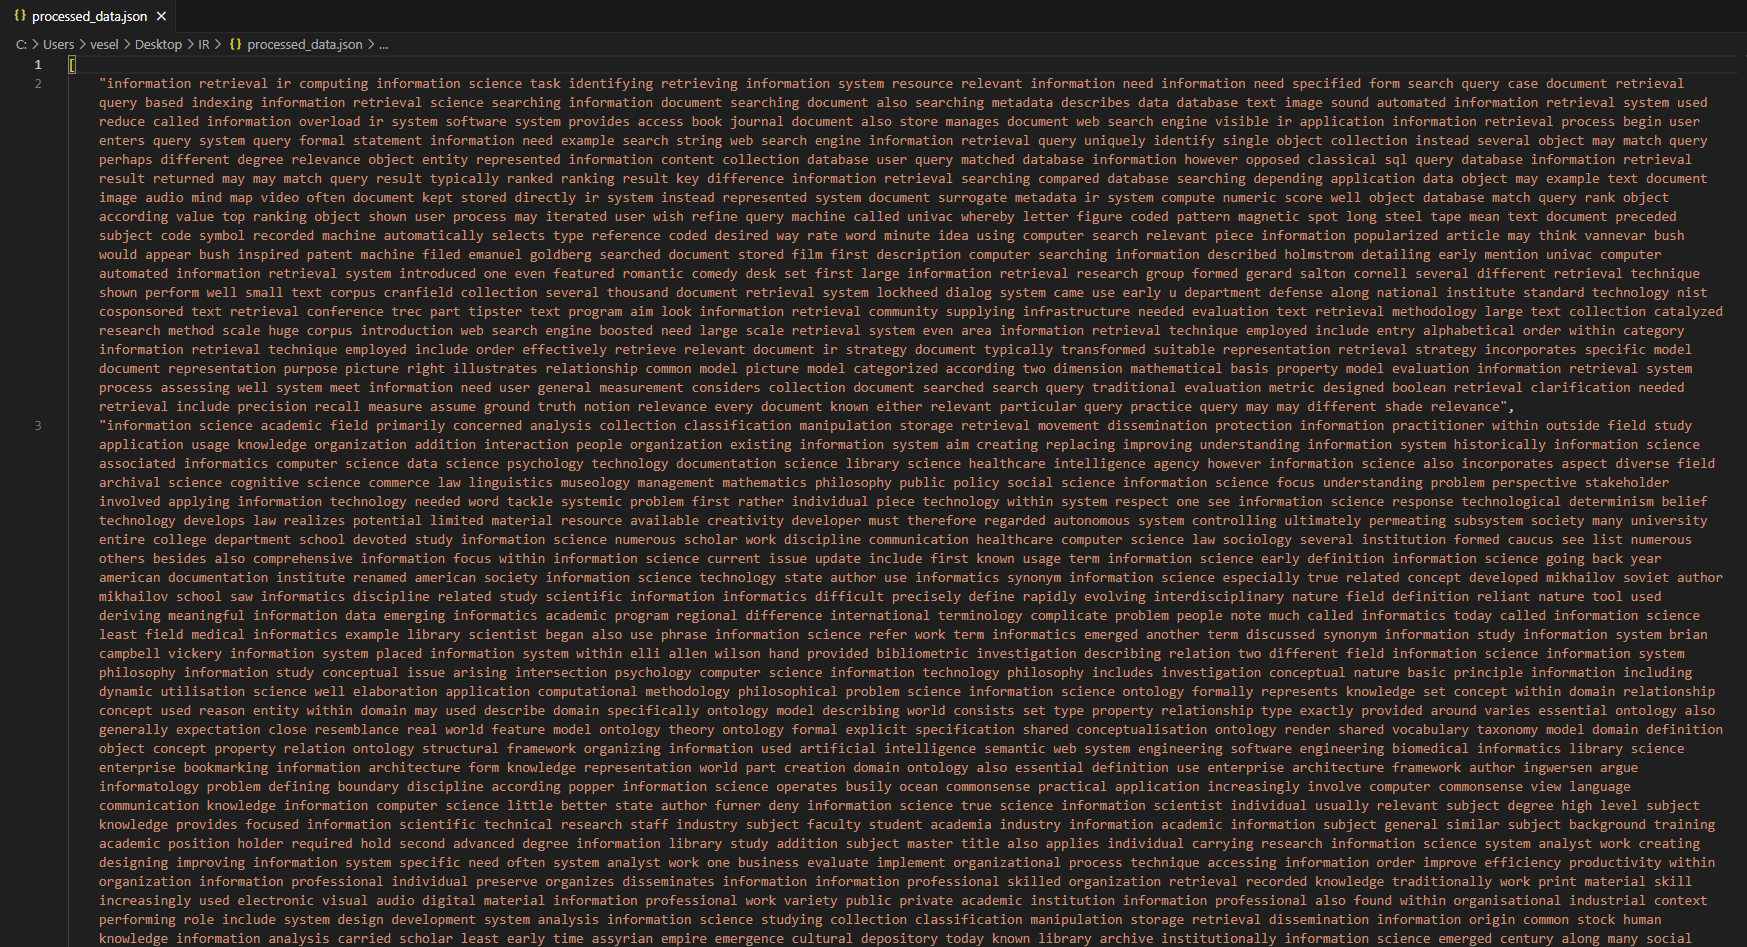

In [32]:
from IPython.display import Image, display

image_path = r"processed_data_screen.png"
display(Image(filename=image_path))

## Βήμα 3. Ευρετήριο

Κάνου με τα απαραίτητα imports.

In [ ]:
import json

Με την συνάρτηση open ανοίγουμε το αρχείο processed_data.json που δημιουγρήθηκε από το προηγούμενο βήμα και περνάμε τα περιοχόμενα του στην μεταβλητή data. Το περικυκλωνουμε με μια try except σε περίπτωση που δεν βρούμε το αρχείο, και αν προκύψει σφάλμα εκπτυπωνουμε "File not found"  και βγαίνουμε από το πρόγραμμα.

In [ ]:
try:
    with open("processed_data.json", "r") as file:
        data = json.load(file)
except FileNotFoundError:
    print("File not found")
    exit(0)

Αρχικοποιούμε το λεξικό μας.

In [ ]:
inverted_index = {}

Με μία for και τη συνάρτηση enumerate, μία συνάρτηση η οποία μας γυρνάει τα δεδομένα που θα της δώσουμε αλλά και έναν μετρητή, με ορίσματα το data, όπου είναι τα προεπεξεργασμένα δεδομένα των άρθρων, και την αρχή του μετρητή το 1 (ώστε να είναι πιο ευανάγνωστο). Στη συνέχεια, χωρίζουμε το ήδη επεξεργασμένο άρθρο σε ξεχωριστά string για κάθε λέξη.

In [ ]:
for doc_id, article in enumerate(data, start=1):
    
    words = article.split()

Για κάθε λέξει ελέγχουμε άμα είναι ήδη στο ευρετήριο και αν όχι την αρχικοποιούμε.

In [ ]:
    for word in words:
        if word not in inverted_index:
            inverted_index[word] = {}

Ελέγχουμε άμα η λέξει που τσεκάρουμε έχει πάρει είδη κλειδί και αν όχι την αρχικοποιούμε με 0.

In [ ]:
        if doc_id not in inverted_index[word]:
            inverted_index[word][doc_id] = 0

Βάζουμε συν ένα στην λέξει που έχουμε βρει.

In [ ]:
        inverted_index[word][doc_id] += 1

Θα δημιουργήσουμε το αρχείο inverted_index_data.json, με το περιεχόμενό του να είναι το αναστραμένω ευρετήριο, χρησιμοποιώντας indent=4 ώστε τα δεδομένα να είναι πιο ευανάγνωστα.

In [ ]:
with open("inverted_index_data.json", "w") as file:
    json.dump(inverted_index, file, indent=4)

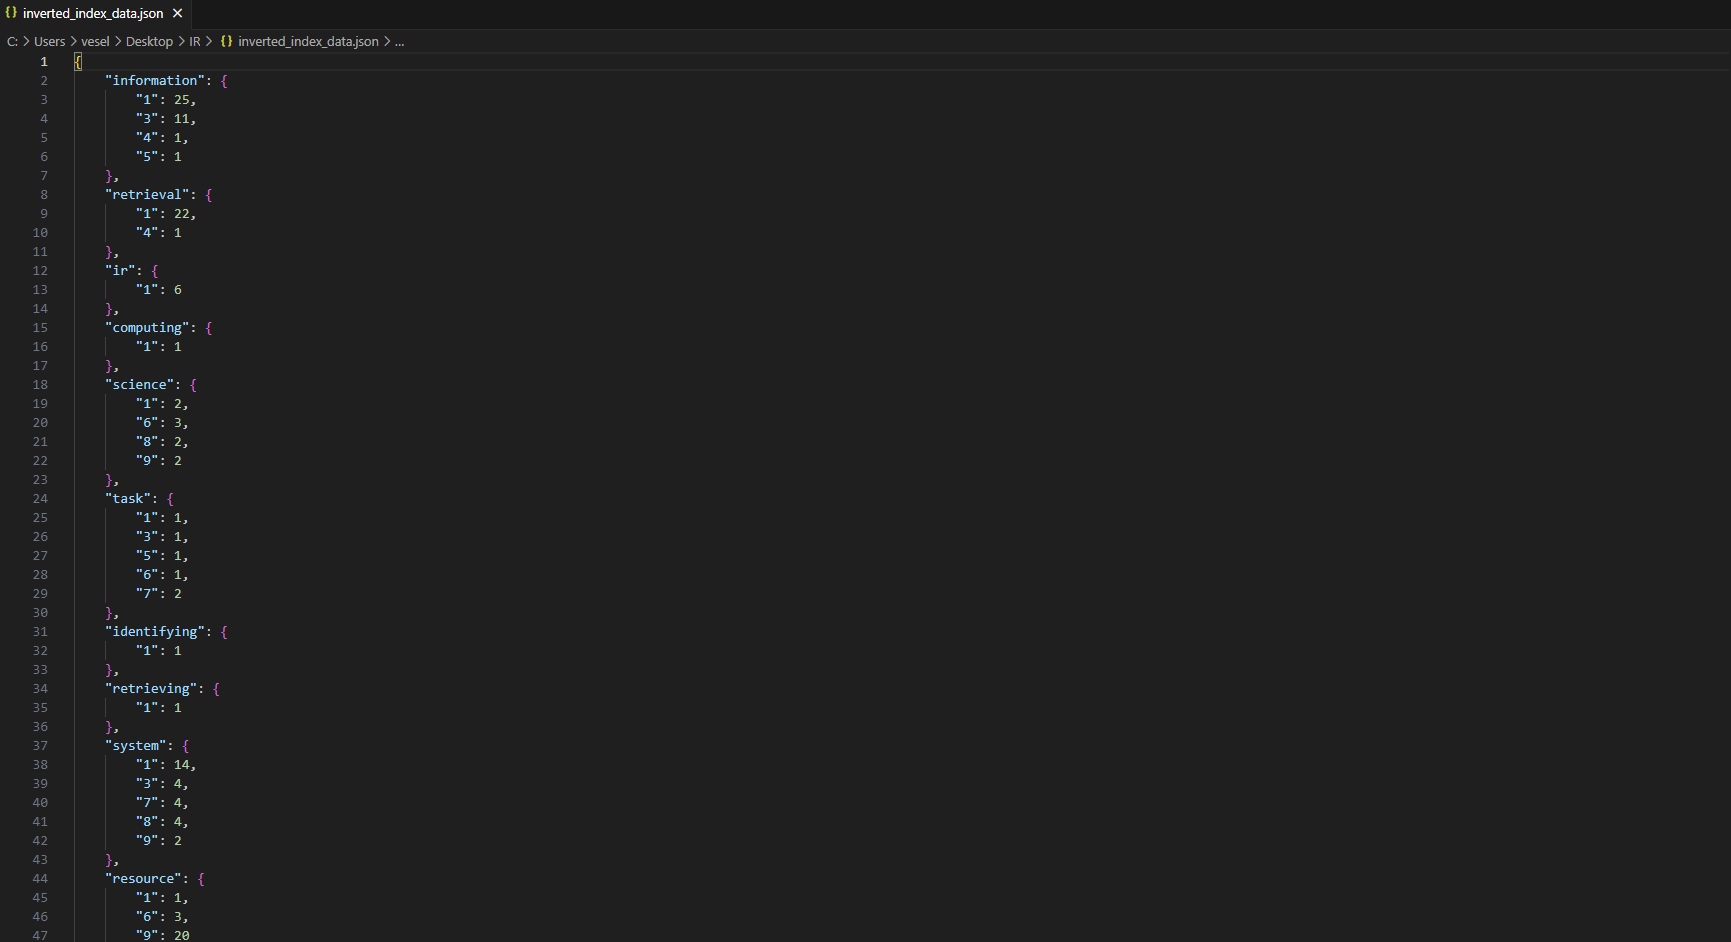

In [34]:
from IPython.display import Image, display

image_path = r"inverted_index_screen.png"
display(Image(filename=image_path))

## Βήμα 4. Μηχανή αναζήτησης

### Backend Search Engine

Κάνουμε τα απαραίτητα imports

In [ ]:
import json
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi

Θα δημιουργήσουμε τη συνάρτηση load_data με σκοπό να διαβάσουμε τα αρχεία data.json, processed_data.json, και inverted_index.json με τον ίδιο τρόπο που κάναμε και στα προηγούμενα βήματα. Αν κατά το άνοιγμα των τριών αρχείων δεν προκύψει κάποιο πρόβλημα, τα επιστρέφουμε· σε αντίθετη περίπτωση, επιστρέφουμε κενό.

In [ ]:
def load_data():
    
    try:
        
        with open("data.json", "r") as data_file:
            data = json.load(data_file)
        
        with open("inverted_index_data.json", "r") as inverted_index_file:
            inverted_index = json.load(inverted_index_file)
            
        with open("processed_data.json","r") as processed_data_file:
             processed_data = json.load(processed_data_file)
            
        return data, processed_data, inverted_index
    
    except FileNotFoundError:
        print("Error loading files")
        
        return None, None, None

Δημιουργούμε τη συνάρτηση preprocess_query με όρισμα τα ερωτήματα του χρήστη και σκοπό την επεξεργασία τους, όπως ακριβώς κάναμε και στο βήμα 2, και επιστρέφουμε το αποτέλεσμα.

In [ ]:
def preprocess_query(query):
    
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(query.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

Η συνάρτηση boolean_search, με όρισμα το ήδη επεξεργασμένο ερώτημα του χρήστη, το inverted_index και τον τελεστή που επέλεξε ο χρήστης, έχει σκοπό τη Boolean αναζήτηση των ερωτημάτων ανάλογα με τον τελεστή που μας παρέχουν. Αρχικοποιούμε μία λίστα all_ids με σκοπό να περάσουμε τα ξεχωριστά κλειδιά του inverted_index. Με μία for παίρνουμε τις τιμές του λεξικού, έπειτα, σε μία φωλιασμένη for, παίρνουμε τα κλειδιά, περνάμε την ακέραια τιμή τους στο index_id, ελέγχουμε αν υπάρχει ήδη η τιμή στο all_ids, και αν όχι, την εκχωρούμε. Τέλος, ταξινομούμε τη λίστα all_ids.

In [ ]:
def boolean_search(query, inverted_index, operator):
    
    all_ids = sorted({int(i) for index in inverted_index.values() for i in index.keys()})

Στη συνέχεια, φτιάχνουμε μία λίστα για την αποθήκευση των αποτελεσμάτων των id που αντιστοιχούν στα ερωτήματα. Με μία for παίρνουμε κάθε όρο του ερωτήματος, διατρέχουμε το ευρετήριο και, αν ο συγκεκριμένος όρος αντιστοιχεί σε κάποια λέξη του ευρετηρίου, παίρνουμε όλα τα id των εγγράφων που αντιστοιχούν και τα προσθέτουμε στη λίστα των αποτελεσμάτων.

In [ ]:
    result_lists = [{int(doc_id) for doc_id in inverted_index.get(term, {}).keys()} for term in query]

Αν ο τελεστής είναι AND, ελέγχουμε πρώτα αν έχουμε αποτελέσματα από το ευρετήριο. Αν όχι, επιστρέφουμε μία κενή λίστα. Αρχικοποιούμε τη λίστα των αποτελεσμάτων με τη intersection όλων των συνόλων στο result_lists. Στη συνέχεια, για κάθε λίστα στο result_lists, συγκρίνουμε τα id των εγγράφων που υπάρχουν στη λίστα των αποτελεσμάτων με αυτά της τρέχουσας λίστας. Για κάθε έγγραφο που υπάρχει και στις δύο λίστες, το κρατάμε στη νέα λίστα των αποτελεσμάτων. Όταν ολοκληρωθούν όλες οι συγκρίσεις, επιστρέφουμε τη λίστα με τα έγγραφα που περιέχουν όλους τους όρους του ερωτήματος.

In [ ]:
    if operator == "AND":
        return list(set.intersection(*result_lists)) if result_lists else []

Σε περίπτωση που ο τελεστής είναι OR, υπολογίζουμε την ένωση όλων των συνόλων στο result_lists, ώστε να περιλαμβάνονται όλα τα έγγραφα που περιέχουν οποιονδήποτε από τους όρους του ερωτήματος. Ταξινομούμε το αποτέλεσμα και επιστρέφουμε τη λίστα με τα id των εγγράφων. Αν η result_lists είναι κενή, επιστρέφουμε μία κενή λίστα.

In [ ]:
    elif operator == "OR":
        return sorted(set.union(*result_lists)) if result_lists else []

Σε περίπτωση που ο τελεστής είναι NOT, ελέγχουμε αν τα αποτελέσματα από το result_lists είναι κενά και, αν ναι, επιστρέφουμε όλα τα διαθέσιμα άρθρα. Διαφορετικά, υπολογίζουμε την ένωση όλων των συνόλων στο result_lists για να βρούμε σε ποια έγγραφα εμφανίζονται τα αποτελέσματα. Στη συνέχεια, συγκρίνουμε τα διαθέσιμα id με αυτά της ένωσης και επιστρέφουμε μόνο τα id που δεν βρίσκονται στη λίστα των αποτελεσμάτων.

In [ ]:
    elif operator == "NOT":
        
        result_union = set.union(*result_lists) if result_lists else set()
        return [i for i in all_ids if i not in result_union]

In [ ]:
def tfidf_ranking(query, processed_data):
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(processed_data)
    query_vector = vectorizer.transform([" ".join(query)])
    
    scores = np.dot(tfidf_matrix, query_vector.T).toarray().flatten()
    rank = np.argsort(scores)
    rank = np.flip(rank)
    
    result = []
    for i in rank:
        if scores[i] > 0:
            result.append((i, scores[i]))
    
    return result

In [ ]:
def bm25_ranking(query, processed_data):
    
    tokenized_data = [data.split(" ") for data in processed_data]
    
    bm25 = BM25Okapi(tokenized_data)
    scores = bm25.get_scores(query)
    
    rank = np.argsort(scores)
    rank = np.flip(rank)
    
    result = []
    for i in rank:
        if scores[i] > 0:
            result.append((i, scores[i]))
    
    return result

### Search Engine Interface

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
from backend_search_engine import load_data, preprocess_query, boolean_search, tfidf_ranking, bm25_ranking

data, processed_data, inverted_index = load_data()

def format_results(results, data):
    if isinstance(results, list) and results and isinstance(results[0], tuple): 
        return "<br>\n".join(
            [
                f'<a href="{data[doc_id].get("article_url", "#")}" target="_blank">'
                f'{data[doc_id].get("title", "Untitled Document")}</a> '
                f"(Score: {score:.4f})"
                for doc_id, score in results
                if 0 <= doc_id < len(data)
            ]
        )
    elif isinstance(results, (list, set)) and results and isinstance(next(iter(results)), int):  # Boolean results
        return "<br>\n".join(
            [
                f'<a href="{data[doc_id - 1].get("article_url", "#")}" target="_blank">'
                f'{data[doc_id - 1].get("title", "Untitled Document")}</a>'
                for doc_id in sorted(results)
                if 0 <= (doc_id - 1) < len(data)
            ]
        )
    return "No matching documents found."


def search_interface(query, operator, algorithm):
    if not data or not processed_data or not inverted_index:
        return "Data files not loaded correctly."

    query_terms = preprocess_query(query)

    if algorithm == "Boolean":
        results = boolean_search(query_terms, inverted_index, operator)
        return format_results(results, data) if results else "No matching documents found."
        
    elif algorithm == "TF-IDF":
        results = tfidf_ranking(query_terms, processed_data)
        return format_results(results, data) if results else "No matching documents found."
        
    elif algorithm == "BM25":
        results = bm25_ranking(query_terms, processed_data)
        return format_results(results, data) if results else "No matching documents found."


query_input = widgets.Text(description="Query:", placeholder="Enter your query")
operator_input = widgets.Dropdown(options=["AND", "OR", "NOT"], description="Operator:")
algorithm_input = widgets.Dropdown(options=["Boolean", "TF-IDF", "BM25"], description="Algorithm:")
output = widgets.Output()

def on_search_click(_):
    with output:
        output.clear_output()
        results = search_interface(query_input.value, operator_input.value, algorithm_input.value)
        display(HTML(results))

search_button = widgets.Button(description="Search")
search_button.on_click(on_search_click)

display(query_input, operator_input, algorithm_input, search_button, output)


AND Result

In [ ]:
from IPython.display import Image, display

image_path = r"AND.png"
display(Image(filename=image_path))

OR Result

In [ ]:
from IPython.display import Image, display

image_path = r"OR.png"
display(Image(filename=image_path))

NOT Result

In [ ]:
from IPython.display import Image, display

image_path = r"NOT.png"
display(Image(filename=image_path))

TF-IDF Result

In [ ]:
from IPython.display import Image, display

image_path = r"TFIDF.png"
display(Image(filename=image_path))

BM25 Result

In [ ]:
from IPython.display import Image, display

image_path = r"BM25.png"
display(Image(filename=image_path))

## Βήμα 5. Αξιολόγηση συστήματος

In [38]:
from backend_search_engine import preprocess_query, boolean_search, tfidf_ranking, bm25_ranking
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import json

def load_data():
    try:
        with open("inverted_index_data.json", "r") as inverted_index_file:
            inverted_index = json.load(inverted_index_file)
            
        with open("processed_data.json", "r") as processed_data_file:
            processed_data = json.load(processed_data_file)
            
        return processed_data, inverted_index
    
    except FileNotFoundError:
        print("Error loading files")
        
        return None, None


def calculate_evaluations(retrieved_docs, relevant_docs, total_docs):
    
    y_true = [1 if i in relevant_docs else 0 for i in range(total_docs)]
    y_pred = [1 if i in retrieved_docs else 0 for i in range(total_docs)]
    
    precision = precision_score(y_true, y_pred, zero_division=0)
    
    recall = recall_score(y_true, y_pred, zero_division=0)
    
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    avg_precision = average_precision_score(y_true, y_pred)
    
    return precision, recall, f1, avg_precision


def main():
    
    processed_data, inverted_index = load_data()
    
    if not processed_data or not inverted_index:
        print("Error loading data. Exiting.")
        return

    queries = [
        "information", 
        "information retrieval",
        "machine learning" ]
    
    relevant_docs = {
        "information": [1, 3, 4, 6, 8, 10, 13, 15, 19, 21, 25, 29, 35, 36, 37, 44, 48, 49],
        "information retrieval": [1, 3, 4, 6, 7, 8, 10, 13, 15, 19, 21, 25, 29, 35, 36, 37, 44, 48, 49],
        "machine learning" : [1, 2, 6, 7, 8, 13, 25, 33, 35, 36, 38, 44, 46, 48, 50],
    }

    total_docs = len(processed_data)

    for query in queries:
        
        query_terms = preprocess_query(query)
        
        and_result = boolean_search(query_terms, inverted_index, "AND")
        or_result = boolean_search(query_terms, inverted_index, "OR")
        not_result = boolean_search(query_terms, inverted_index, "NOT")
        tfidf_result = [doc_id for doc_id, _ in tfidf_ranking(query_terms, processed_data)]
        bm25_result = [doc_id for doc_id, _ in bm25_ranking(query_terms, processed_data)]

        print(f"\nEvaluation for: {query}")
        
        for method, result in [("BOOLEAN AND", and_result), ("BOOLEAN OR", or_result), ("BOOLEAN NOT", not_result),
                               ("TF-IDF", tfidf_result), ("BM25", bm25_result)]:
            
            precision, recall, f1, avg_precision = calculate_evaluations(result, relevant_docs[query], total_docs)
            
            print(f"\n{method}:")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")
            print(f"  MAP: {avg_precision:.4f}")


if __name__ == "__main__":
    main()



Evaluation for: information

BOOLEAN AND:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MAP: 1.0000

BOOLEAN OR:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  MAP: 1.0000

BOOLEAN NOT:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  MAP: 0.3600

TF-IDF:
  Precision: 0.2222
  Recall: 0.2222
  F1-Score: 0.2222
  MAP: 0.3294

BM25:
  Precision: 0.2222
  Recall: 0.2222
  F1-Score: 0.2222
  MAP: 0.3294

Evaluation for: information retrieval

BOOLEAN AND:
  Precision: 1.0000
  Recall: 0.1053
  F1-Score: 0.1905
  MAP: 0.4453

BOOLEAN OR:
  Precision: 1.0000
  Recall: 0.9474
  F1-Score: 0.9730
  MAP: 0.9674

BOOLEAN NOT:
  Precision: 0.0323
  Recall: 0.0526
  F1-Score: 0.0400
  MAP: 0.3617

TF-IDF:
  Precision: 0.2778
  Recall: 0.2632
  F1-Score: 0.2703
  MAP: 0.3531

BM25:
  Precision: 0.2778
  Recall: 0.2632
  F1-Score: 0.2703
  MAP: 0.3531

Evaluation for: machine learning

BOOLEAN AND:
  Precision: 1.0000
  Recall: 0.0714
  F1-Score: 0.1333
  MAP: 0.3314
